# Assignment 3: Hopfield Networks


In [342]:
import numpy as np
import matplotlib.pyplot as plt

In [326]:
class HopfieldNetwork:
    def __init__(self):
        self.weights = None

    def train(self, patterns, check, synchronous=False):
        self.patterns = patterns

        # W = xT * x
        self.weights = np.sum([p.reshape((-1,1))*p.reshape((1,-1)) for p in patterns], axis=0).astype(np.float)

        # divide by number of units
        self.weights /= self.weights.shape[0]

        if check:
            patterns_to_learn = len(patterns)
            patterns_learnt = 0
            for pattern in patterns:
                output = self.recall(pattern, synchronous)
                if output.all() == pattern.all():
                    patterns_learnt += 1

            compare_array = output == pattern
            if compare_array.all():
                print("All", patterns_learnt, "patterns learnt." )
            else:
                print("Only", patterns_learnt, "patterns learnt." )

    
    def recall(self, pattern, synchronous=False):
        if synchronous:
            # print("Running Recall")
            output = np.sign(np.dot(pattern,self.weights))
            # takes care of zeros
            output[output == 0] = -1
            return output
    
    def check_attractors(self):
        attractors = set()
        possibilities = len(self.patterns[0])

        for num in range(0, 2**possibilities):
            # Decimal to binary number list conversion and fill with zeros 
            binnum = np.array([int(i) for i in bin(num)[2:].zfill(8)])
            
            # change all 0 to -1
            binnum[binnum == 0] = -1

            # add possible output to data
            output = self.recall(binnum, synchronous=True)

            # print(output)
            attractors.add(str(output))

        print(len(attractors),"attractors found. The attractors are:")
        for i in attractors:
            print(i)

        


## Part 2- Preliminary

In [327]:
x1=[-1, -1, 1, -1, 1, -1, -1, 1]
x2=[-1, -1, -1, -1, -1, 1, -1, -1]
x3=[-1, 1, 1, -1, -1, 1, -1, 1]
training_patterns = np.array([x1,x2,x3])

hopfield_network_test = HopfieldNetwork()
hopfield_network_test.train(training_patterns, True, synchronous=True)

All 3 patterns learnt.


## Part 3.1 Convergence and Attractors
Recall of stored patterns from distorted inputs?

In [328]:
def recall_test(distorted_pattern, expected_pattern, trained_network, synchronous=False, max_iterations = 100):
    output = trained_network.recall(distorted_pattern, synchronous)
    recall_iterations = 1

    compare_array = np.array([2]) == np.array([1])
    while not compare_array.all():
        compare_array = expected_pattern == output
        if compare_array.all():
            print("SUCCESS. \t", distorted_pattern, "->", output,"after", recall_iterations, "iterations.")
            print()
            break
        elif recall_iterations == max_iterations:
            print("FAILURE. \t", distorted_pattern, "!->", expected_pattern, "after", recall_iterations, "iterations." )
            # print("\t Final output was", output)
            print()
            break
        else:
            recall_iterations += 1
            output = trained_network.recall(output, synchronous)

        # print("FAILURE. Input", distorted_pattern, "gives", output,".", expected_pattern, "was expected.")


### 3.1.1
Attempt at using trained network to converge distored inputs to learnt outputs.
Use the 2nd x1d to test with 5 differences.

In [329]:
x1d=np.array([ 1, -1, 1, -1, 1, -1, -1, 1])
x2d=np.array([ 1, 1, -1, -1, -1, 1, -1, -1])
x3d=np.array([ 1, 1, 1, -1, 1, 1, -1, 1])

recall_test(x1d, x1, hopfield_network_test, synchronous=True, max_iterations=100)
recall_test(x2d, x2, hopfield_network_test, synchronous=True, max_iterations=100)
recall_test(x3d, x3, hopfield_network_test, synchronous=True, max_iterations=100)

SUCCESS. 	 [ 1 -1  1 -1  1 -1 -1  1] -> [-1. -1.  1. -1.  1. -1. -1.  1.] after 1 iterations.

SUCCESS. 	 [ 1  1 -1 -1 -1  1 -1 -1] -> [-1. -1. -1. -1. -1.  1. -1. -1.] after 2 iterations.

SUCCESS. 	 [ 1  1  1 -1  1  1 -1  1] -> [-1.  1.  1. -1. -1.  1. -1.  1.] after 2 iterations.



### 3.1.2 Check attractors.

In [330]:
hopfield_network_test.check_attractors()

19 attractors found. The attractors are:
[-1. -1.  1. -1.  1. -1. -1.  1.]
[ 1. -1. -1.  1. -1. -1.  1. -1.]
[ 1.  1.  1.  1.  1. -1.  1.  1.]
[-1.  1.  1. -1.  1. -1. -1.  1.]
[ 1.  1. -1.  1. -1. -1.  1. -1.]
[-1. -1.  1. -1. -1. -1. -1.  1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
[ 1.  1. -1.  1.  1. -1.  1. -1.]
[ 1.  1.  1.  1. -1.  1.  1.  1.]
[-1.  1.  1. -1. -1. -1. -1.  1.]
[ 1. -1.  1.  1.  1. -1.  1.  1.]
[ 1. -1. -1.  1. -1.  1.  1. -1.]
[-1. -1.  1. -1. -1.  1. -1.  1.]
[-1.  1. -1. -1. -1.  1. -1. -1.]
[ 1.  1. -1.  1. -1.  1.  1. -1.]
[ 1. -1. -1.  1.  1. -1.  1. -1.]
[-1. -1. -1. -1. -1. -1. -1. -1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]
[-1. -1. -1. -1.  1. -1. -1. -1.]


### 3.1.3 Use a very dissimlar pattern

With 5 different values, the networks was unable to converge to the first value.

In [338]:
x1d=np.array([ 1, -1, -1, 1, -1, -1, 1, 1])
recall_test(x1d, x1, hopfield_network_test, synchronous=True, max_iterations=100)

FAILURE. 	 [ 1 -1 -1  1 -1 -1  1  1] !-> [-1, -1, 1, -1, 1, -1, -1, 1] after 100 iterations.



## Part 3.2- Sequential Update
This network will have 1024 neurons and be used on pictures. 
Load the data from pict.dat. There are 9 1024 dimension patterns. 

Generate Images

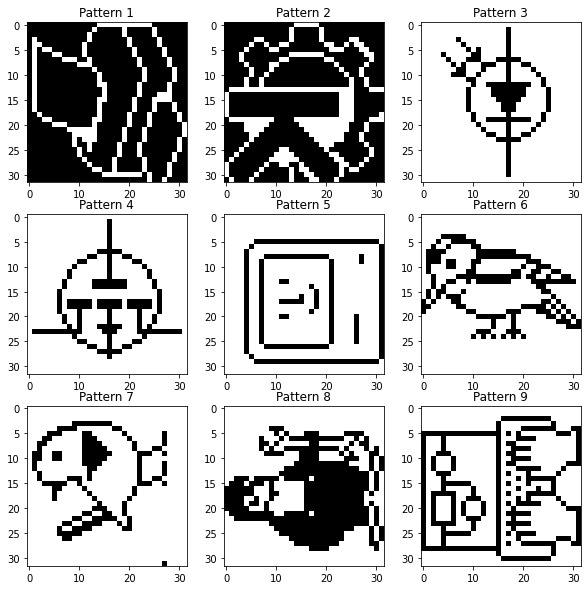

In [370]:
# load data with info in each column per image
pics = np.genfromtxt('pict.dat', delimiter=',').reshape(-1,1024)
fig = plt.figure(figsize=(10,10))
for i, pattern in enumerate(pics[:9,:]):
    fig.add_subplot(330 + i + 1)
    plt.imshow(pattern.reshape(32, 32), cmap='gray')
    plt.title("Pattern " + str(i+1))

In [400]:
def recall_image_test(distorted_pattern, expected_pattern, trained_network, synchronous=False, max_iterations = 100):
    output = trained_network.recall(distorted_pattern, synchronous)
    recall_iterations = 1

    compare_array = np.array([2]) == np.array([1])
    while not compare_array.all():
        compare_array = expected_pattern == output
        if compare_array.all():
            print("SUCCESS after", recall_iterations, "iterations.")
            print()
            return output
        elif recall_iterations == max_iterations:
            print("FAILURE after", recall_iterations, "iterations." )
            # print("\t Final output was", output)
            print()
            return output
        else:
            recall_iterations += 1
            output = trained_network.recall(output, synchronous)

### 3.1.1 Check if first 3 are stable
Train network then run recall network afterwards. 

In [378]:
p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11 = pics[0], pics[1], pics[2], pics[3], pics[4], pics[5], pics[6], pics[7], pics[8], pics[9], pics[10]

hopfield_network_pics = HopfieldNetwork()
hopfield_network_pics.train(pics[0:3], True, synchronous=True)

All 3 patterns learnt.


In [388]:
pic1_stability_check = recall_image_test(p1, p1, hopfield_network_pics, synchronous=True, max_iterations = 100)
pic2_stability_check = recall_image_test(p2, p2, hopfield_network_pics, synchronous=True, max_iterations = 100)
pic3_stability_check = recall_image_test(p3, p3, hopfield_network_pics, synchronous=True, max_iterations = 100)

SUCCESS after 1 iterations.

SUCCESS after 1 iterations.

SUCCESS after 1 iterations.



Check p1,p2,p3 on the network.

Text(0.5, 1.0, 'Pattern 1')

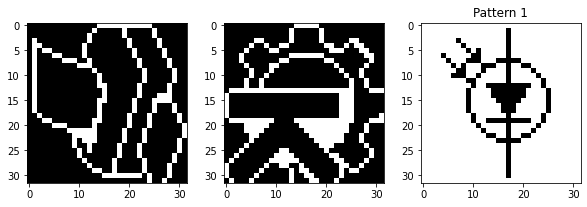

In [391]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(331)
plt.imshow(pic1_stability_check.reshape(32, 32), cmap='gray')
fig.add_subplot(332)
plt.imshow(pic2_stability_check.reshape(32, 32), cmap='gray')
fig.add_subplot(333)
plt.imshow(pic3_stability_check.reshape(32, 32), cmap='gray')
plt.title("Pattern 1")

### 3.2.2 Check Degraded patterns

In [401]:
pic1_degraded = recall_image_test(p10, p1, hopfield_network_pics, synchronous=True, max_iterations = 100)
pic2_degraded = recall_image_test(p11, p2, hopfield_network_pics, synchronous=True, max_iterations = 10000)
pic3_degraded = recall_image_test(p11, p3, hopfield_network_pics, synchronous=True, max_iterations = 10000)

SUCCESS after 1 iterations.

FAILURE after 10000 iterations.

FAILURE after 10000 iterations.



Text(0.5, 1.0, 'After Network')

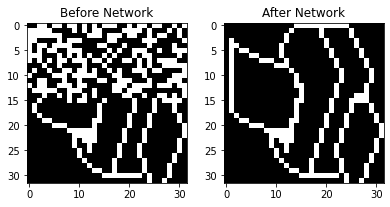

In [405]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(331)
plt.imshow(p10.reshape(32, 32), cmap='gray')
plt.title("Before Network")
fig.add_subplot(332)
plt.imshow(pic1_degraded.reshape(32, 32), cmap='gray')
plt.title("After Network")